<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
## openEO Platform
#### Big Data From Space 2023
Exploring Corine Land Cover

### Connect to openEO Platform using python

In [1]:
import openeo

In [2]:
conn = openeo.connect("openeo.cloud")

In [3]:
conn = conn.authenticate_oidc()

Authenticated using refresh token.


### Look at the collection description

In [4]:
conn.describe_collection("corine_land_cover")

{'cube:dimensions': {'bands': {'type': 'bands', 'values': ['CLC']},
  't': {'extent': [['2000-12-15T00:00:00', '2018-12-15T00:00:00']],
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [1400000.0, 7900000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [100000.0, 4500000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'}},
 'description': 'The CORINE Land Cover (CLC) inventory began in 1985, consisting of 44 land cover classes. This collection is resampled and stored at a 10m x 10m resolution. For further information on CORINE land cover see [here](https://land.copernicus.eu/pan-european/corine-land-cover)',
 'extent': {'spatial': {'bbox': [[-32.091997820189285,
     31.6977150076753,
     55.116146716432254,
     72.11413813793037]]},
  'temporal': {'interval': [['2000-12-15T00:00:00Z',
     '2018-12-15T00:00:00Z']]}},
 'id': 'corine_land_cover',
 'item_assets': {},
 'keywords': ['EODC', 'Copernicus', 'ARD', 'Level-3'],
 'license': 'proprietary',
 'links': [{'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections',
   'rel': 'root'},
  {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections',
   'rel': 'parent'},
  {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections/corine_land_cover',
   'rel': 'self'}],
 'properties': {},
 'stac_extensions': ['https://stac-extensions.github.io/datacube/v2.0.0/schema.json',
  'https://stac-extensions.github.io/item-assets/v1.0.0/schema.json',
  'https://github.com/stac-extensions/eo'],
 'stac_version': '1.0.0',
 'summaries': {'constellation': {},
  'eo:bands': [{'common_name': 'band_1', 'name': 'CLC'}],
  'federation:backends': ['eodc'],
  'odc:file_format': {'0': 'GeoTIFF'},
  'odc:product_family': {'0': 'level2'},
  'platform': {}},
 'title': 'CORINE Land Cover',
 'type': 'Collection'}

### The following table displays the corine land cover classes and their associated numbers
#### Pick a number for a class of interest

In [5]:
import pandas as pd
pd.read_csv("clc-classes.csv", index_col="number")

,class
number,
1,Continuous urban fabric
2,Discontinuous urban fabric
3,Industrial or commercial units
4,Road and rail networks and associated land
5,Port areas
6,Airports
7,Mineral extraction sites
8,Dump sites
9,Construction sites


### Start creating an openEO process graph
#### Pick a spatial extent of interest

In [22]:
from eo_utils import openeoMap
center = [48.2, 16.4]
zoom = 12

eoMap = openeoMap(center,zoom)
eoMap.map

Map(center=[48.2, 16.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [21]:
from openeo.util import to_bbox_dict
bbox = eoMap.getBbox()
spatial_extent = to_bbox_dict(bbox) 
print(spatial_extent)

{'west': 16.295149, 'south': 48.132241, 'east': 16.511443, 'north': 48.273197}


#### Load the corine land cover collection

In [23]:
data = conn.load_collection('corine_land_cover', spatial_extent = spatial_extent, temporal_extent = ["2000-01-01","2020-06-30"])

#### If you are interested in a specific class, pick the number of the class and set the data equal to it.

In [32]:
data_4 = data == 4

#### Save the result as a netCDF

In [33]:
saved_data = data_4.save_result(format="NetCDF")
saved_data.flat_graph()

{'loadcollection1': {'process_id': 'load_collection',
  'arguments': {'id': 'corine_land_cover',
   'spatial_extent': {'west': 16.295149,
    'south': 48.132241,
    'east': 16.511443,
    'north': 48.273197},
   'temporal_extent': ['2000-01-01', '2020-06-30']}},
 'apply1': {'process_id': 'apply',
  'arguments': {'data': {'from_node': 'loadcollection1'},
   'process': {'process_graph': {'eq1': {'process_id': 'eq',
      'arguments': {'x': {'from_parameter': 'x'}, 'y': 4},
      'result': True}}}}},
 'saveresult1': {'process_id': 'save_result',
  'arguments': {'data': {'from_node': 'apply1'},
   'format': 'NetCDF',
   'options': {}},
  'result': True}}

#### Create and start a job

In [34]:
job = saved_data.create_job()
job.start_job()

<BatchJob job_id='eodc-737cd55b-fd2c-48f0-b3ef-6b4fd6a67111'>

In [35]:
job

<BatchJob job_id='eodc-737cd55b-fd2c-48f0-b3ef-6b4fd6a67111'>

#### Download the results, when the job is finished

In [36]:
results = job.get_results()
metadata = results.get_metadata()
results.download_files("./roads/")

[PosixPath('roads/EU010M_E052N016T1_20001215T000000.nc'),
 PosixPath('roads/EU010M_E052N016T1_20061215T000000.nc'),
 PosixPath('roads/EU010M_E052N016T1_20121215T000000.nc'),
 PosixPath('roads/EU010M_E052N016T1_20181215T000000.nc'),
 PosixPath('roads/job-results.json')]

### Looking at the results using python matplotlib

In [37]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data_2000 = xr.open_dataset("./roads/EU010M_E052N016T1_20001215T000000.nc")
data_2018 = xr.open_dataset("./roads/EU010M_E052N016T1_20181215T000000.nc")

corine_2000 = data_2000.B01.values
corine_2018 = data_2018.B01.values
print("Road and rail networks and associated land in 2000: ", np.sum(corine_2000))
print("Road and rail networks and associated land in 2018: ", np.sum(corine_2018))

Road and rail networks and associated land in 2000:  69667.0
Road and rail networks and associated land in 2018:  83342.0


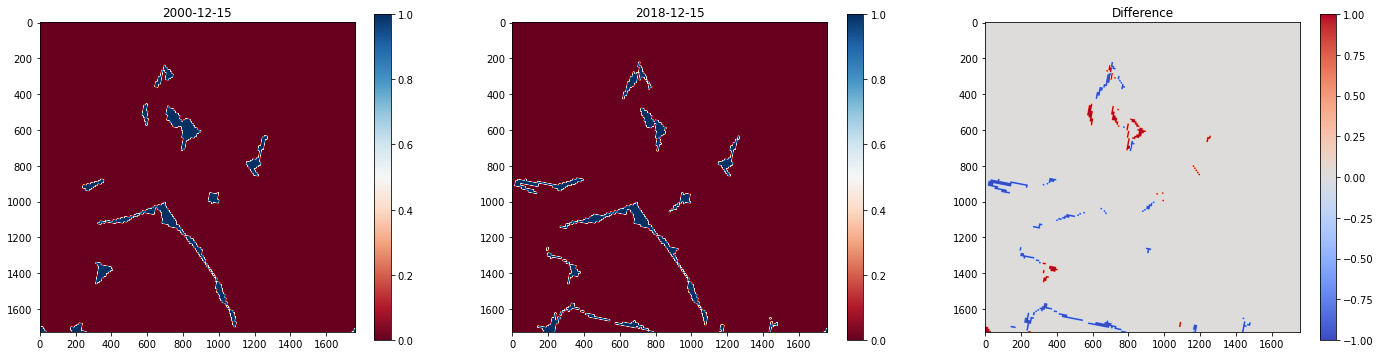

In [38]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
plt.title("2000-12-15")
plt.imshow(corine_2000, cmap = "RdBu")   
plt.colorbar()

plt.subplot(1,3,2)
plt.title("2018-12-15")
plt.imshow(corine_2018, cmap = "RdBu")   
plt.colorbar()

plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(corine_2000 - corine_2018, cmap = "coolwarm")   
plt.colorbar()

### Showing results of a different example: Looking at Green urban areas (Corine Land Cover class 10) at Vienna, Austria.

In [39]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data_2000 = xr.open_dataset("./green/EU010M_E052N016T1_20001215T000000.nc")
data_2018 = xr.open_dataset("./green/EU010M_E052N016T1_20181215T000000.nc")

corine_2000 = data_2000.B01.values
corine_2018 = data_2018.B01.values
print("Green urban areas in 2000: ", np.sum(corine_2000))
print("Green urban areas in 2018: ", np.sum(corine_2018))

Green urban areas in 2000:  150077.0
Green urban areas in 2018:  214405.0


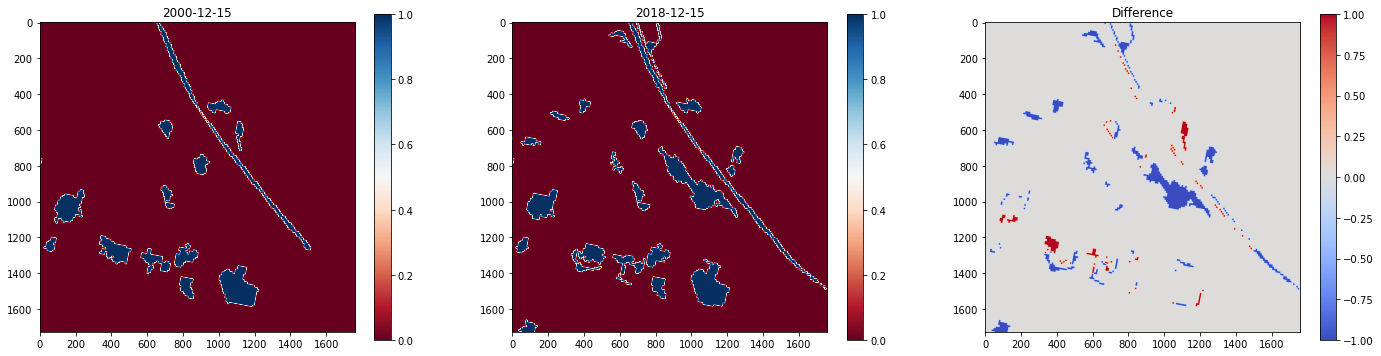

In [40]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
plt.title("2000-12-15")
plt.imshow(corine_2000, cmap = "RdBu")   
plt.colorbar()

plt.subplot(1,3,2)
plt.title("2018-12-15")
plt.imshow(corine_2018, cmap = "RdBu")
plt.colorbar()

plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(corine_2000 - corine_2018, cmap = "coolwarm")   
plt.colorbar()

### Showing results of a different example: Looking at glaciers and perpetual snow (Corine Land Cover class 34) at Pasterze, Austria.

In [41]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data_2000 = xr.open_dataset("./glaciers/EU010M_E049N015T1_20001215T000000.nc")
data_2018 = xr.open_dataset("./glaciers/EU010M_E049N015T1_20181215T000000.nc")

corine_2000 = data_2000.B01.values
corine_2018 = data_2018.B01.values
print("Glaciers and perpetual snow in 2000: ", np.sum(corine_2000))
print("Glaciers and perpetual snow in 2018: ", np.sum(corine_2018))

Glaciers and perpetual snow in 2000:  695032.0
Glaciers and perpetual snow in 2018:  461108.0


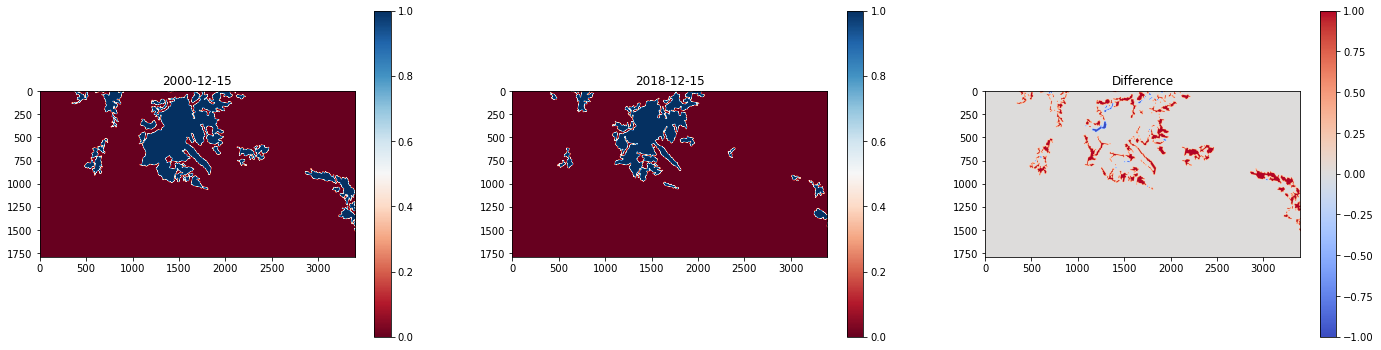

In [42]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
plt.title("2000-12-15")
plt.imshow(corine_2000, cmap = "RdBu")   
plt.colorbar()

plt.subplot(1,3,2)
plt.title("2018-12-15")
plt.imshow(corine_2018, cmap = "RdBu")   
plt.colorbar()

plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(corine_2000 - corine_2018, cmap = "coolwarm")   
plt.colorbar()